We are going to retrieve some air temperature TMY data from the Solcast API and plot it.

In [1]:
from solcast import tmy

To test the API you can use [unmetered locations](https://docs.solcast.com.au/?_gl=1*k80zyt*_ga*MzQ4NzM2ODEuMTY5MDI2MzUwOQ..*_ga_BYH3TC3R79*MTY5MjIzOTc0NS4xOC4xLjE2OTIyMzk3NzQuMC4wLjA.&_ga=2.240435015.595123581.1692145391-34873681.1690263509#unmetered-locations), in the SDK:

In [2]:
from solcast.unmetered_locations import load_test_locations_coordinates
latitudes, longitudes = load_test_locations_coordinates()

Let's retreive the TMY data for the Giza Pyramids in Cairo. The API lets you specify the timezone in the request by adding a `time_zone` parameter:

In [3]:
res = tmy.radiation_and_weather(
    latitudes[4], longitudes[4],
    output_parameters='air_temp',
    time_zone=2  # in January there are 2h between the Cairo timzone and UTC
)

The `Response` object in the SDK lets you easliy transform the data received from the API to a Pandas DataFrame. Make sure that Pandas is installed if you want to use this functionality:

In [9]:
df = res.to_pandas()
df.head()

,air_temp
period_end,
2059-01-01 01:00:00+02:00,11
2059-01-01 02:00:00+02:00,11
2059-01-01 03:00:00+02:00,10
2059-01-01 04:00:00+02:00,10
2059-01-01 05:00:00+02:00,10


For visualization purposes we can create a copy shifted to UTC:

In [6]:
import pandas as pd
df_utc = df.copy()
df_utc.index = df.index + pd.Timedelta(hours=2)

<Figure size 1200x500 with 0 Axes>

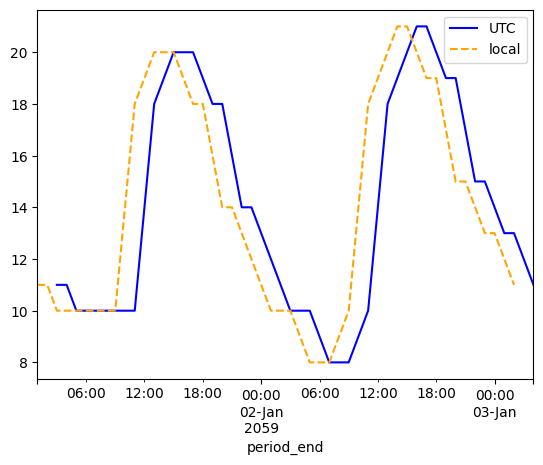

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
ax = df_utc[:50].plot(label='utc', color='blue')
ax = df[:50].plot(label='local time', ax=ax, color='orange', linestyle='dashed')
ax.legend(["UTC", "local"]);

plt.show()